In [1]:
from matplotlib import cm # Para manejar colores
import numpy as np
import matplotlib.pyplot as plt

# Grafica 3D

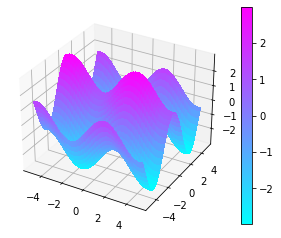

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

def f(x,y):
  return np.sin(x) + 2*np.cos(y)

res = 100

X = np.linspace(-5, 5, res)
Y = np.linspace(-5, 5, res)

X, Y = np.meshgrid(X, Y)

Z = f(X,Y) 

# Gráficar la superficie
surf = ax.plot_surface(X, Y, Z, cmap=cm.cool,
                       linewidth=0, antialiased=False)

fig.colorbar(surf)


## Descenso del gradiente

Punto inicial random: [-0.14307137  2.39416049] con valor de -1.6094573608376614
Punto final: [-1.57572093  3.13659265] con valor de -2.999962874181618


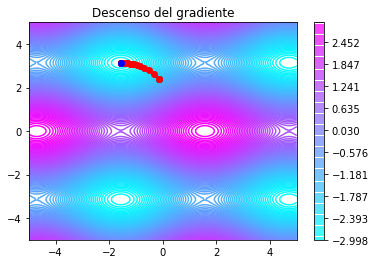

In [3]:
level_map = np.linspace(np.min(Z), np.max(Z),res) 
plt.contour(X, Y, Z, levels=level_map,cmap=cm.cool)
plt.colorbar()
plt.title('Descenso del gradiente')


p = np.random.rand(2) * 8 - 4 # generar dos valores aleatorios
plt.plot(p[0],p[1],'o', c='k')

print(f'Punto inicial random: {p} con valor de {f(p[0],p[1])}')

h = 0.01
lr = 0.01

def derivate(cp,p):
  return (f(cp[0], cp[1]) - f(p[0], p[1])) / h

def gradient(p):
  grad = np.zeros(2)
  for idx, val in enumerate(p):
    cp = np.copy(p)
    cp[idx] = cp[idx] + h

    dp = derivate(cp, p)
    grad[idx] = dp
  return grad
  
for i in range(1000):
  p = p - lr * gradient(p)

  if(i % 20 == 0):
    plt.plot(p[0],p[1],'o', c='r')

plt.plot(p[0],p[1],'o', c='b')

print(f'Punto final: {p} con valor de {f(p[0],p[1])}')